## General purpose of analysis

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Feature columns:
   - Pregnancies - Number of times pregnant
   - Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   - BloodPressure - Diastolic blood pressure (mm Hg)
   - SkinThickness - Triceps skin fold thickness (mm)
   - Insulin - 2-Hour serum insulin (mu U/ml)
   - BMI - Body mass index
   - DiabetesPedigreeFunction - Diabetes pedigree function
   - Age - Age
    
#### Label column:
   - Outcome - 1 means positive prediction, 0 is negative

### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There isn't any missing value, but for some rows there is value 0 in columns where it can't be. Example BMI, Glucose, etc.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

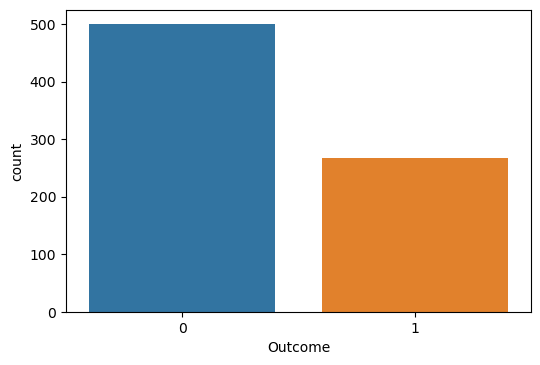

In [8]:
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(data=df, x='Outcome')

<AxesSubplot:>

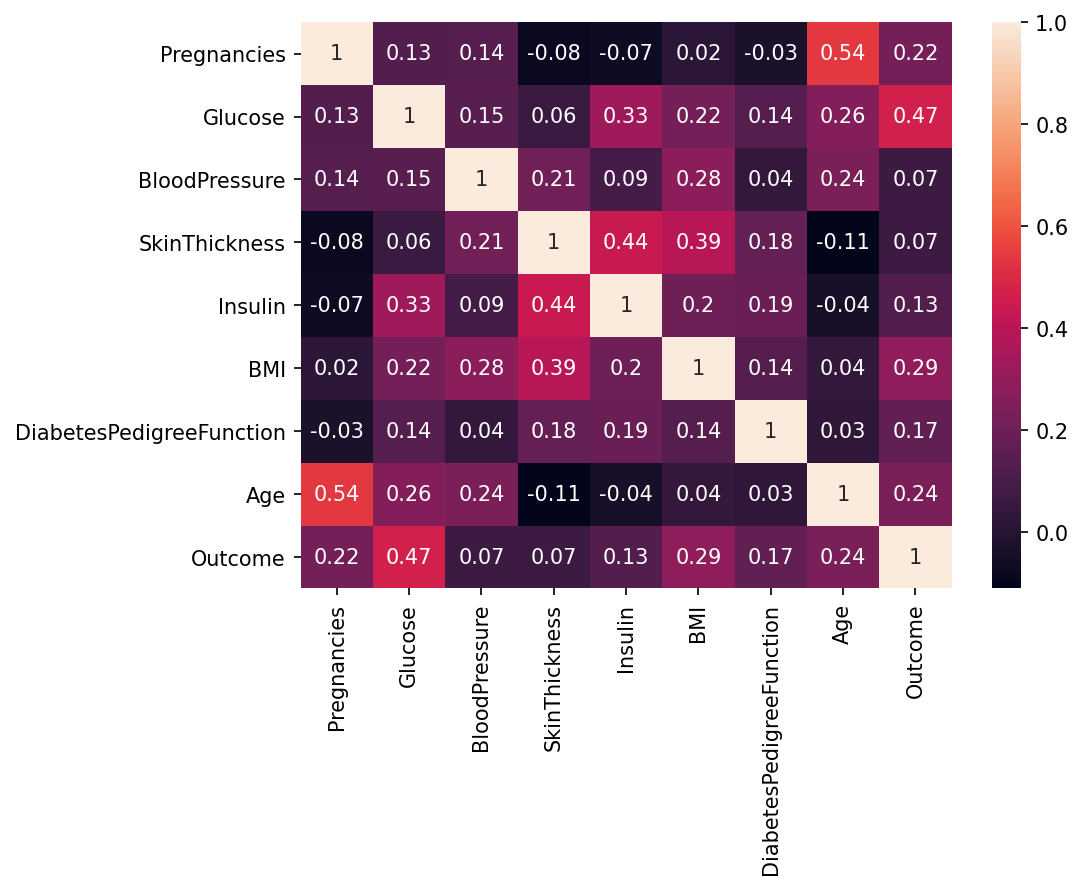

In [9]:
plt.figure(figsize=(7,5),dpi=150)
sns.heatmap(np.round(df.corr(),2),annot=True)

In [10]:
features_influence = df.corr()['Outcome']

In [11]:
features_influence = pd.DataFrame(data=features_influence)

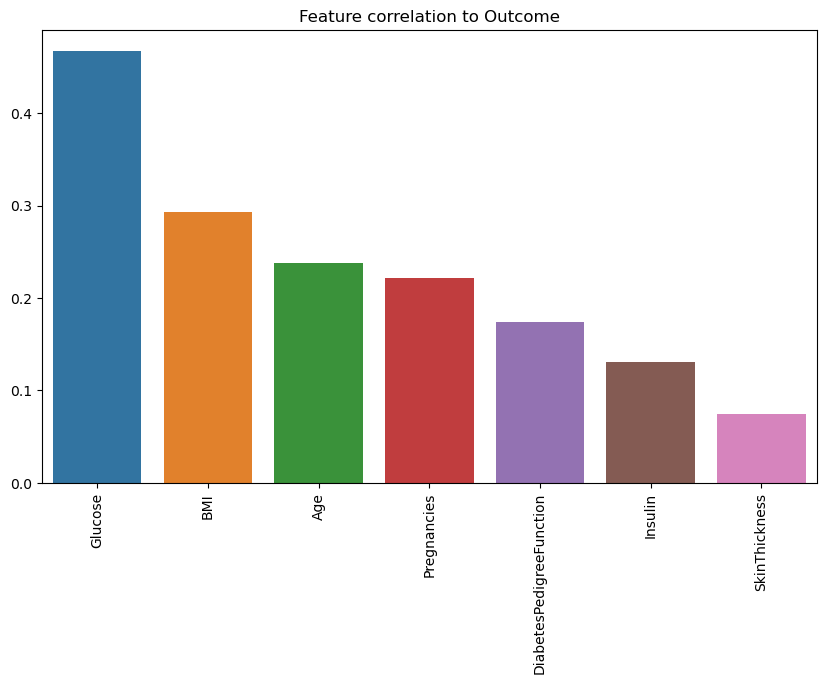

In [12]:
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(x=features_influence['Outcome'].sort_values(ascending=False).iloc[1:-1].index,
            y=features_influence['Outcome'].sort_values(ascending=False).iloc[1:-1].values)
plt.title('Feature correlation to Outcome')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

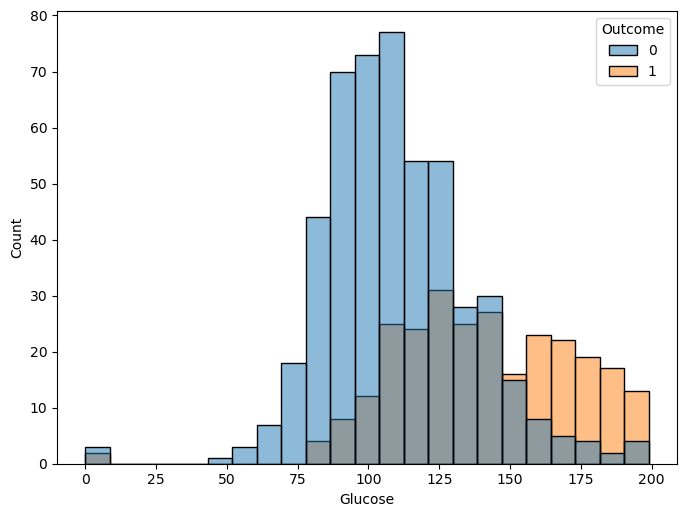

In [13]:
plt.figure(figsize=(8,6),dpi=100)
sns.histplot(data=df, x='Glucose',hue='Outcome')

<AxesSubplot:xlabel='SkinThickness', ylabel='BMI'>

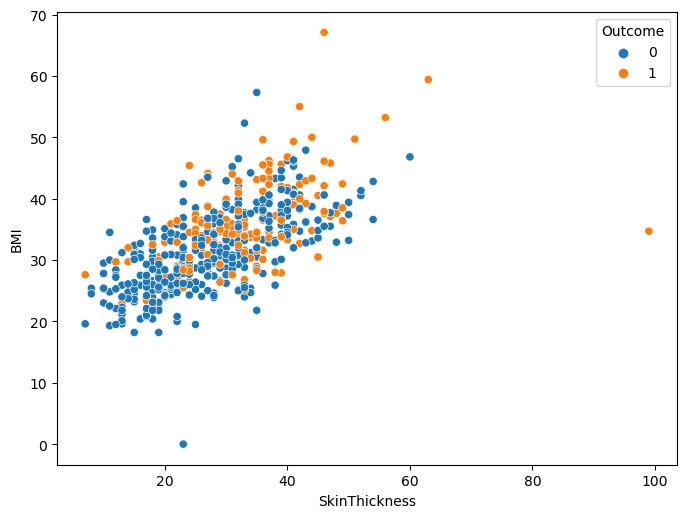

In [14]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=df[df['SkinThickness']!=0], x='SkinThickness',y='BMI', hue='Outcome')

<Figure size 600x400 with 0 Axes>

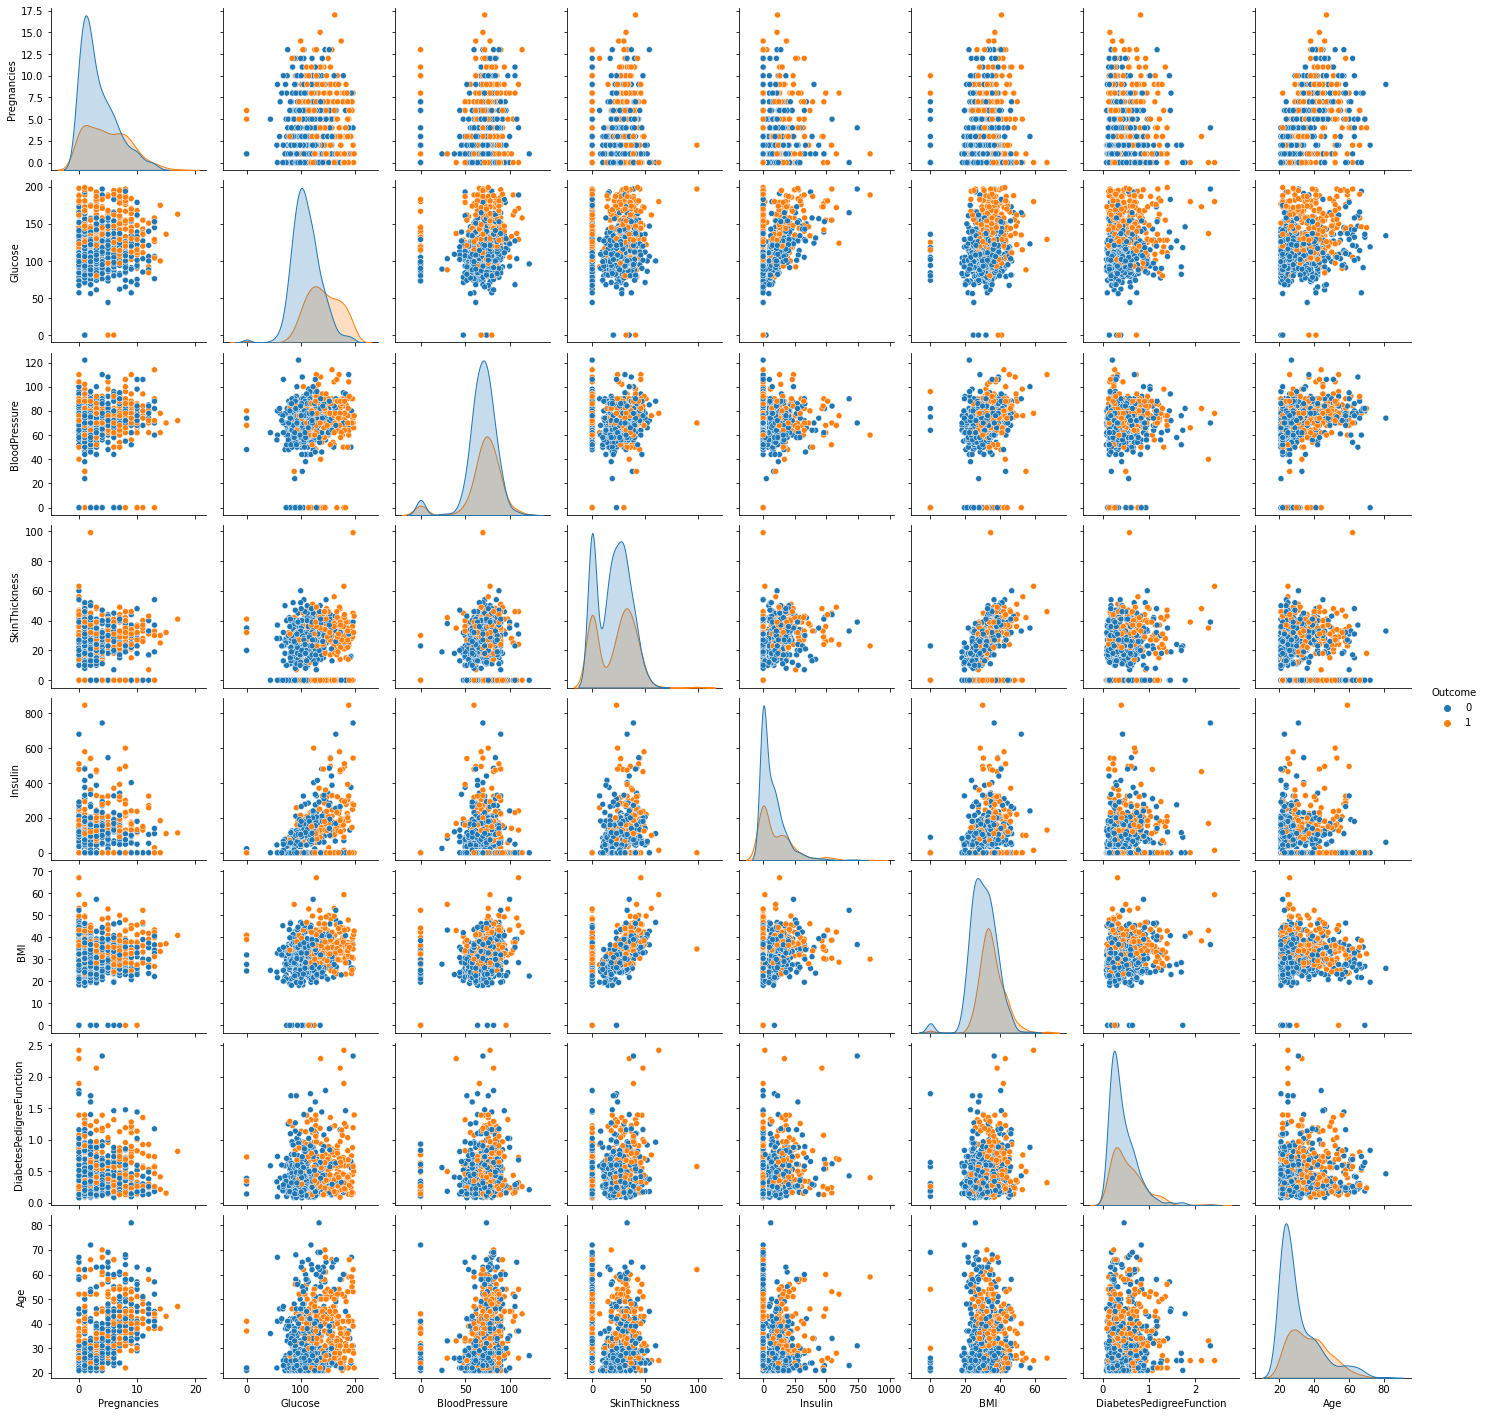

In [15]:
plt.figure(dpi=100)
sns.pairplot(data=df, hue='Outcome')

### Outliers

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<AxesSubplot:xlabel='Pregnancies'>

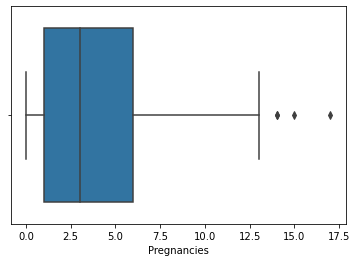

In [17]:
# It can be 0
sns.boxplot(data=df, x='Pregnancies')

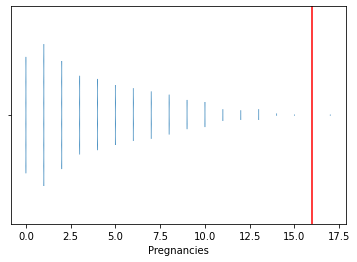

In [18]:
sns.swarmplot(data=df, x='Pregnancies',size=1)
plt.axvline(x=16,color='r')

In [19]:
df = df[df['Pregnancies']<16]

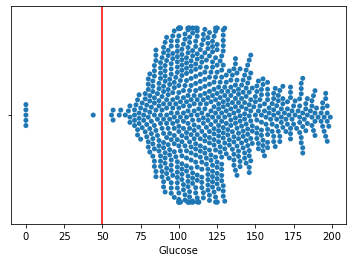

In [20]:
# Can not be 0
sns.swarmplot(data=df, x='Glucose')
plt.axvline(x=50,color='r')

In [21]:
df = df[df['Glucose'] > 50]

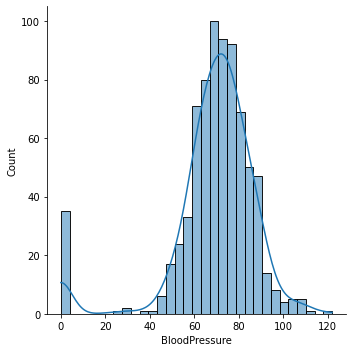

In [22]:
# Can not be 0
sns.displot(data=df, x='BloodPressure',kde=True)

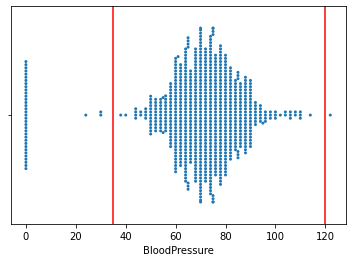

In [23]:
sns.swarmplot(data=df,x='BloodPressure',size=3)
plt.axvline(x=35,color='r')
plt.axvline(x=120,color='r')

In [24]:
df = df[(df['BloodPressure'] > 35) & (df['BloodPressure'] < 120)]

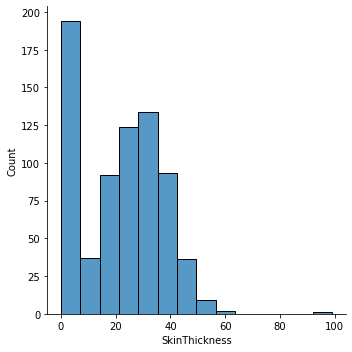

In [25]:
# Can not be 0
sns.displot(data=df, x='SkinThickness')

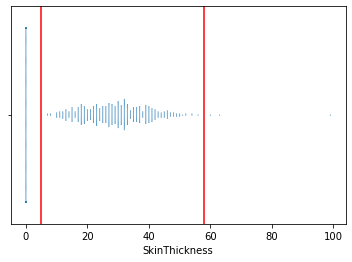

In [26]:
sns.swarmplot(data=df, x='SkinThickness', size=1)
plt.axvline(x=58,color='r')
plt.axvline(x=5,color='r')

In [27]:
df = df[(df['SkinThickness']>5) & (df['SkinThickness'] < 58)]

<AxesSubplot:xlabel='Insulin'>

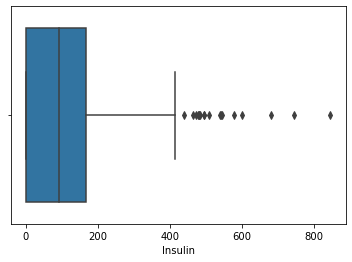

In [28]:
# Can not be 0
sns.boxplot(data=df, x='Insulin')

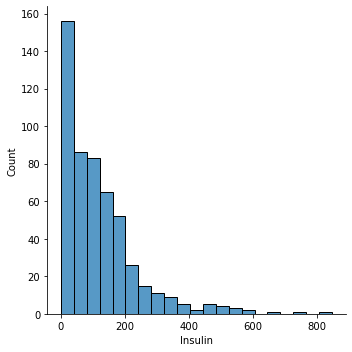

In [29]:
sns.displot(data=df, x='Insulin')

In [30]:
df['Insulin'].sort_values().unique()

array([  0,  15,  16,  18,  22,  23,  29,  32,  36,  37,  38,  40,  41,
        42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,  68,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,  99, 100,
       105, 106, 108, 110, 112, 114, 115, 116, 119, 120, 122, 125, 126,
       127, 128, 129, 130, 132, 135, 140, 142, 144, 145, 146, 148, 150,
       152, 155, 156, 158, 159, 160, 165, 166, 167, 168, 170, 171, 175,
       176, 178, 180, 182, 183, 184, 185, 188, 190, 191, 192, 193, 194,
       196, 200, 204, 205, 207, 210, 215, 220, 225, 228, 230, 231, 235,
       237, 240, 245, 249, 250, 255, 258, 265, 270, 271, 272, 274, 275,
       277, 278, 280, 284, 285, 291, 293, 300, 304, 310, 318, 321, 325,
       326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402, 415, 440,
       465, 474, 478, 480, 485, 495, 510, 540, 543, 545, 579, 60

In [31]:
df = df[(df['Insulin']>10) & (df['Insulin']<600)]

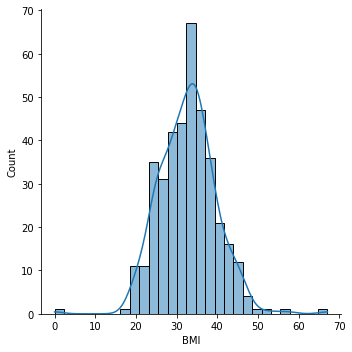

In [32]:
# Can not be 0
sns.displot(data=df, x='BMI',kde=True)

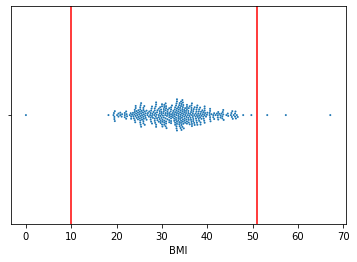

In [33]:
sns.swarmplot(data=df,x='BMI',size=2)
plt.axvline(x=51,color='r')
plt.axvline(x=10,color='r')

In [34]:
df = df[(df['BMI']>10) & (df['BMI']<51)]

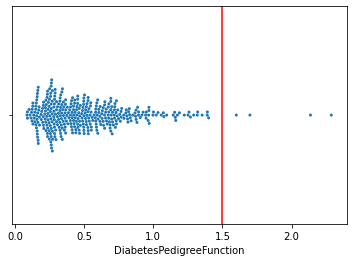

In [35]:
# Can not be 0 
sns.swarmplot(data=df, x='DiabetesPedigreeFunction',size=3)
plt.axvline(x=1.5,color='r')

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

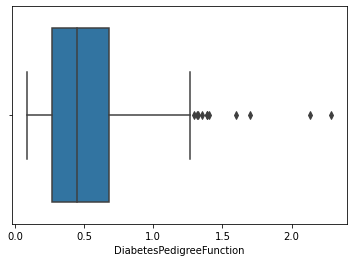

In [36]:
sns.boxplot(data=df, x='DiabetesPedigreeFunction')

In [37]:
df = df[df['DiabetesPedigreeFunction'] < 1.5]

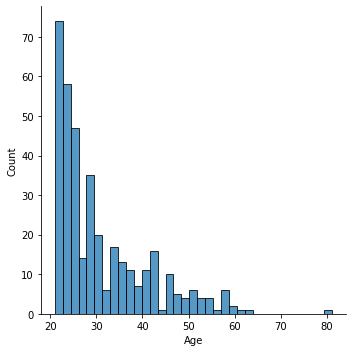

In [38]:
# Is not 0
sns.displot(data=df, x='Age',bins=35)

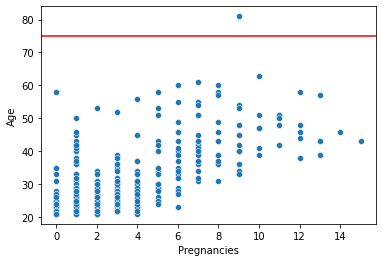

In [39]:
sns.scatterplot(data=df, x='Pregnancies', y='Age')
plt.axhline(y=75,color='r')

In [40]:
df = df[df['Age']<75]

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,374.0,3.320856,3.149321,0.000,1.000,2.000,5.00000,15.0
Glucose,374.0,121.938503,30.465098,56.000,99.000,119.000,142.75000,198.0
BloodPressure,374.0,70.828877,11.654435,38.000,62.000,70.000,78.00000,110.0
SkinThickness,374.0,28.727273,10.211461,7.000,21.000,29.000,36.00000,52.0
Insulin,374.0,150.550802,104.024055,15.000,76.000,125.500,189.50000,579.0
BMI,374.0,32.640642,6.319051,18.200,28.325,33.100,36.75000,49.7
DiabetesPedigreeFunction,374.0,0.496294,0.286437,0.085,0.268,0.439,0.67125,1.4
Age,374.0,30.719251,9.851378,21.000,23.000,27.000,36.00000,63.0
Outcome,374.0,0.323529,0.468449,0.000,0.000,0.000,1.00000,1.0


<Figure size 600x400 with 0 Axes>

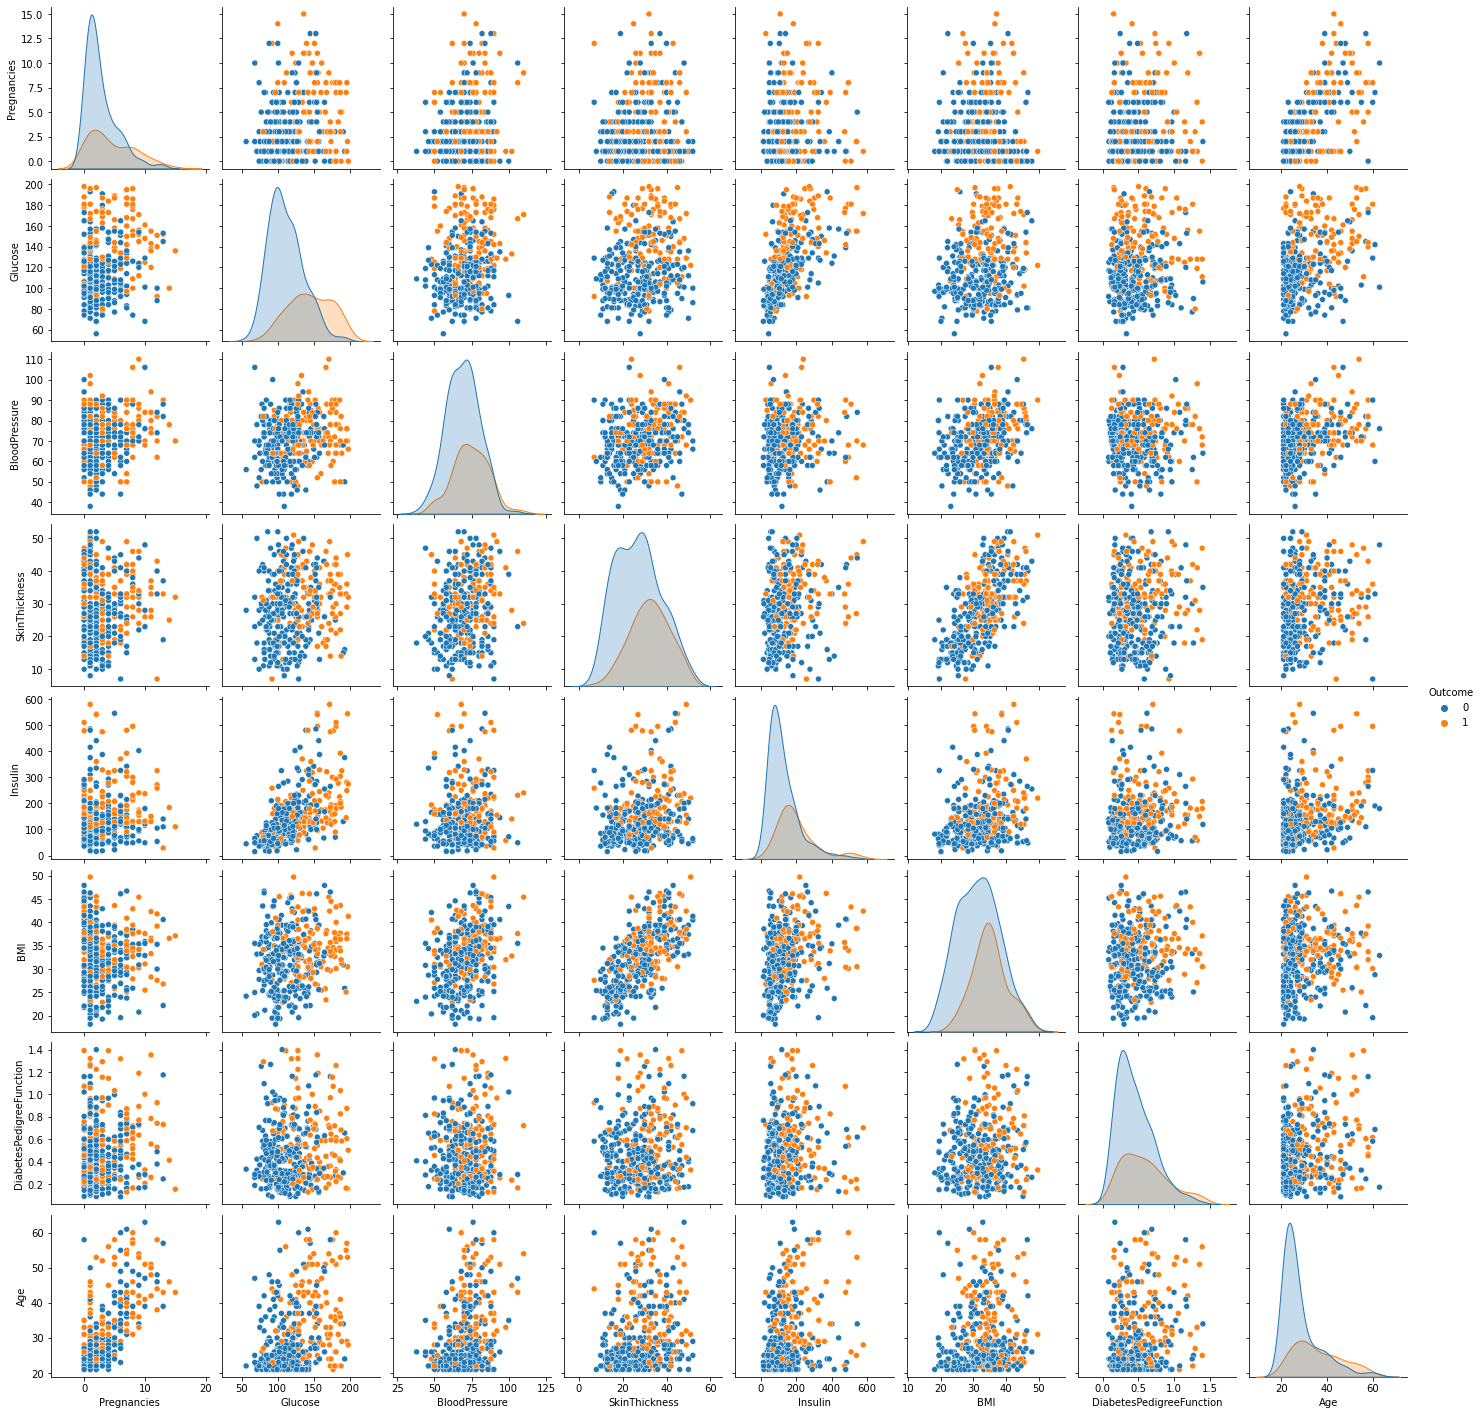

In [42]:
plt.figure(dpi=100)
sns.pairplot(data=df, hue='Outcome')

### ML model

In [43]:
df['Outcome'].value_counts()

0    253
1    121
Name: Outcome, dtype: int64

In [44]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [46]:
len(df)

374

In [47]:
len(X_train)

299

In [48]:
len(X_test)

75

In [49]:
scaler = StandardScaler() 

In [50]:
scaled_X_train = scaler.fit_transform(X_train)

In [51]:
scaled_X_test = scaler.transform(X_test)

In [52]:
def create_model(model, params):
    model_grid = GridSearchCV(model, params)
    model_grid.fit(X_train,y_train)
    print("Tuned hyperparameters - {}".format(model_grid.best_params_))
    print()
    return model_grid.best_params_

In [53]:
def validate_model(model,params):
    model.set_params(**params)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("Accuracy - {}".format(accuracy_score(y_test, pred)))
    print()
    plot_confusion_matrix(model, X_test, y_test)
    print(classification_report(y_test, pred))
    return model, pred

#### Logistic Regression

In [54]:
model_log = LogisticRegression(class_weight='balanced')

In [55]:
param_grid_log = {'penalty':['l1','l2'],
             'C':[0.001,0.01,0.1,1],
             'solver':['lbfgs','liblinear','sag','saga'],
             'max_iter':[1,100,200,300,1000],
             'l1_ratio':[0,0.001,0.01,0.1,1]}

Tuned hyperparameters - {'C': 0.1, 'l1_ratio': 0, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}

Accuracy - 0.8266666666666667

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        50
           1       0.69      0.88      0.77        25

    accuracy                           0.83        75
   macro avg       0.81      0.84      0.82        75
weighted avg       0.85      0.83      0.83        75



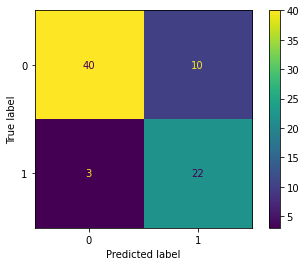

In [56]:
model_log, pred_log = validate_model(model_log, create_model(model_log,param_grid_log))

#### KNN

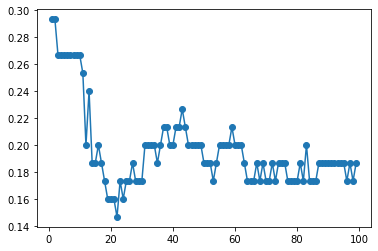

In [57]:
error_knn = []
for i in range(1,100):
    model = KNeighborsClassifier(n_neighbors=i, weights='distance')
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    error_knn.append(1 - accuracy_score(y_test, pred))
plt.plot(range(1,100),error_knn,marker='o')

In [58]:
model_knn = KNeighborsClassifier(n_neighbors=error_knn.index(min(error_knn))+1, weights='distance')

In [59]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22, weights='distance')

In [60]:
pred_knn = model_knn.predict(X_test)

In [61]:
print("Accuracy - {}".format(accuracy_score(y_test, pred_knn)))

Accuracy - 0.8533333333333334


In [62]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90        50
           1       0.85      0.68      0.76        25

    accuracy                           0.85        75
   macro avg       0.85      0.81      0.83        75
weighted avg       0.85      0.85      0.85        75



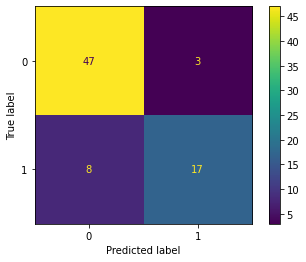

In [63]:
plot_confusion_matrix(model_knn, X_test, y_test)

#### SVM

In [64]:
model_svm = SVC(class_weight='balanced')

In [65]:
param_grid_svm = {'C':[1,10,100,200,300],
                 'kernel':['linear','rbf','sigmoid']}

Tuned hyperparameters - {'C': 200, 'kernel': 'rbf'}

Accuracy - 0.7866666666666666

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        50
           1       0.64      0.84      0.72        25

    accuracy                           0.79        75
   macro avg       0.77      0.80      0.78        75
weighted avg       0.82      0.79      0.79        75



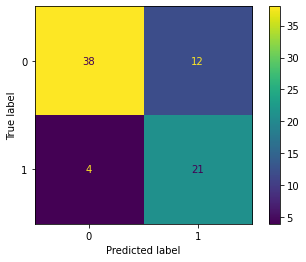

In [66]:
model_svm, pred_svm = validate_model(model_svm, create_model(model_svm,param_grid_svm))

#### Decision Tree

In [67]:
model_tree = DecisionTreeClassifier(random_state=101,class_weight='balanced')

In [68]:
param_grid_tree = {'criterion':['gini','entroyp','log_loss'],
                  'max_depth':[1,2,3,4],
                  'max_features':['auto','sqrt','log2']}

Tuned hyperparameters - {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto'}

Accuracy - 0.76

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        50
           1       0.61      0.76      0.68        25

    accuracy                           0.76        75
   macro avg       0.74      0.76      0.74        75
weighted avg       0.78      0.76      0.77        75



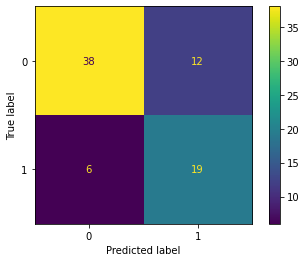

In [69]:
model_tree, pred_tree = validate_model(model_tree, create_model(model_tree,param_grid_tree))

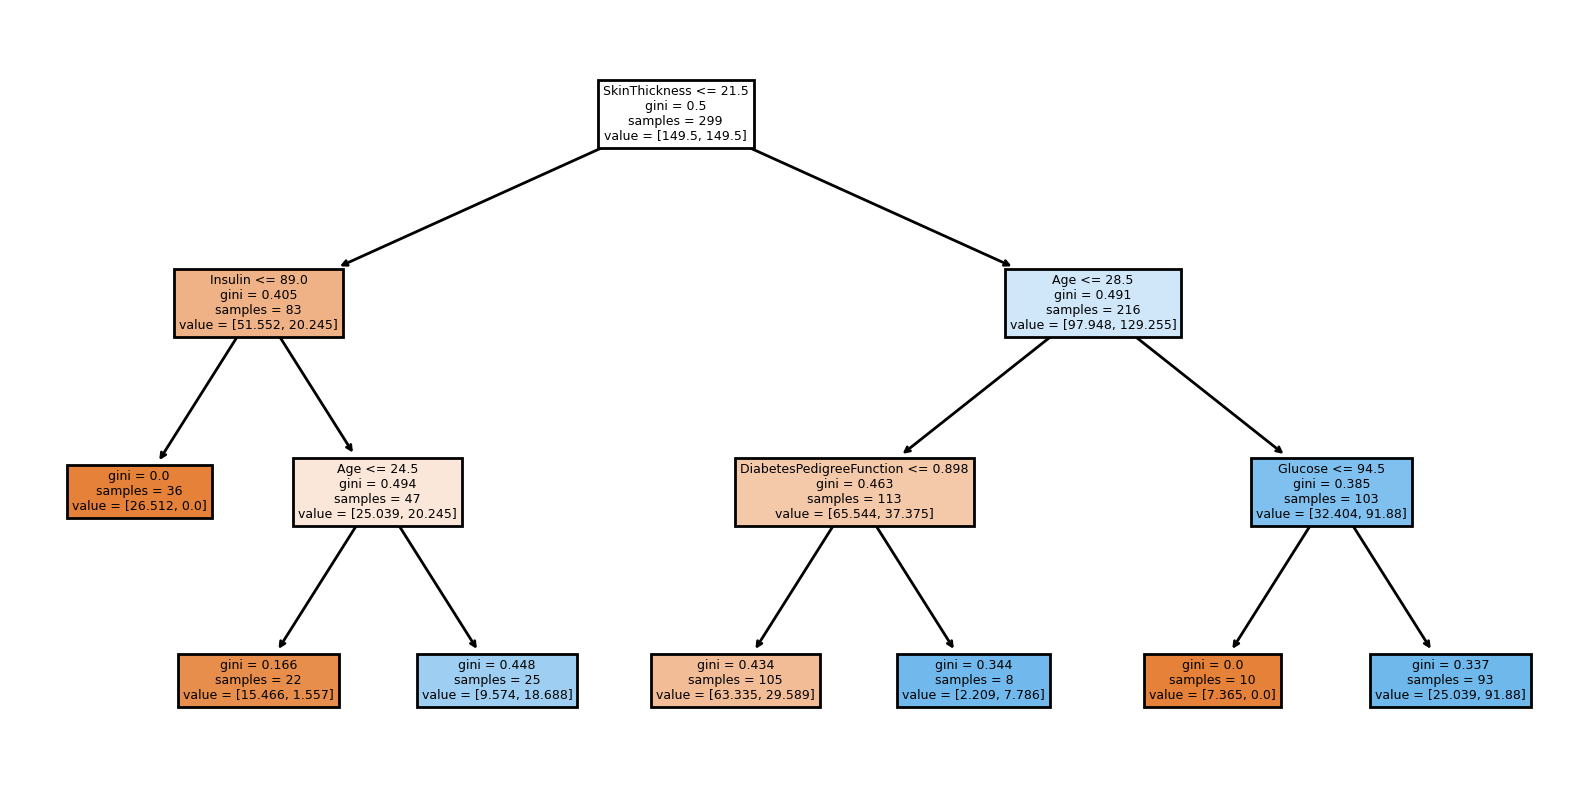

In [70]:
plt.figure(figsize=(10,5),dpi=200)
plot_tree(model_tree,feature_names=X.columns,filled=True);

#### Random Forest

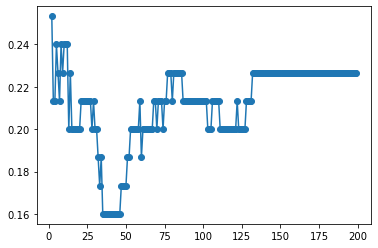

In [71]:
error_rfc = []
for i in range(2,200):
    model = RandomForestClassifier(n_estimators=i,class_weight='balanced',random_state=101,bootstrap=True,oob_score=True)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    error_rfc.append(1 - accuracy_score(y_test, pred))
plt.plot(range(2,200),error_rfc,marker='o')

In [72]:
model_rfc = RandomForestClassifier(n_estimators=error_rfc.index(min(error_rfc))+2,class_weight='balanced',random_state=101,bootstrap=True,oob_score=True)

In [73]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=35, oob_score=True,
                       random_state=101)

In [74]:
pred_rfc = model_rfc.predict(X_test)

In [75]:
print("Accuracy - {}".format(accuracy_score(y_test, pred_rfc)))

Accuracy - 0.84


In [76]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        50
           1       0.74      0.80      0.77        25

    accuracy                           0.84        75
   macro avg       0.82      0.83      0.82        75
weighted avg       0.84      0.84      0.84        75



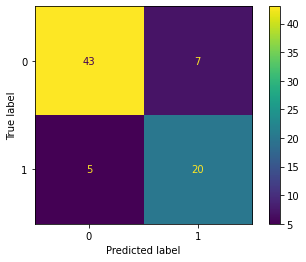

In [77]:
plot_confusion_matrix(model_rfc,X_test,y_test)

In [78]:
model_rfc.oob_score_

0.745819397993311

#### AdaBoost 

In [79]:
model_ada = AdaBoostClassifier(random_state=101)

In [80]:
param_grid_ada = {'n_estimators':list(range(1,9)),
                  'learning_rate':np.linspace(0.1,10,50)}

Tuned hyperparameters - {'learning_rate': 0.7061224489795919, 'n_estimators': 4}

Accuracy - 0.8

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        50
           1       0.71      0.68      0.69        25

    accuracy                           0.80        75
   macro avg       0.78      0.77      0.77        75
weighted avg       0.80      0.80      0.80        75



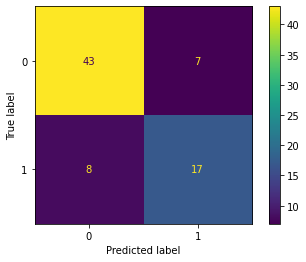

In [81]:
model_ada, pred_ada = validate_model(model_ada, create_model(model_ada,param_grid_ada))

#### Gradient Boost

In [82]:
model_grad = GradientBoostingClassifier(random_state=101)

In [83]:
param_grid_grad= {'loss':['log_loss','deviance'],
                 'learning_rate':[0.01,0.05,0.1,1],
                 'n_estimators':[100,200,500],
                 'max_depth':[1,2,3,4],
                 'max_features':['auto','sqrt','log2']}

Tuned hyperparameters - {'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}

Accuracy - 0.8266666666666667

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        50
           1       0.73      0.76      0.75        25

    accuracy                           0.83        75
   macro avg       0.80      0.81      0.81        75
weighted avg       0.83      0.83      0.83        75



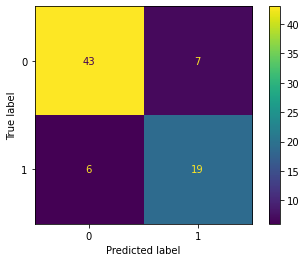

In [84]:
model_grad, pred_grad = validate_model(model_grad, create_model(model_grad,param_grid_grad))

Note that the dataset was unbalanced (253 negative, 121 positive). The top 3 models in terms of average scores are, in order:
- K nearest neighbors,
- Random forest,
- Logistic regression.

If we wanted to think about actually using a model that predicts disease in a patient, our goal would be to minimize the amount of FN (even more FP would not be such a concern). The models with the fewest FNs are, in order:
- Logistic Regression,
- SVM
- Random Forest.